## Stock Market Prediction with Machine Learning 

**Objectives:**

* To create a machine learning model that can predict S&P index price given historical data
* To back test the model on 20+ years of historical data

## Workflow

In [10]:
# ! pip install pandas numpy matplotlib seaborn

  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.49.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
  Using cached pillow-10.2.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
! pip install scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl (46.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl (17 kB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

%matplotlib inline
pd.set_option("display.max_columns", 50)

#### 1. Download S&P 500 Price data

First import the `yfinance` package, that calls the Yahoo Finance API to download daily stock and index prices

In [1]:
import yfinance as yf

[Helpful Read](https://medium.com/@kasperjuunge/yfinance-10-ways-to-get-stock-data-with-python-6677f49e8282)\
The `Ticker` class allows you to to access various data for a specific stock.\
In our case, it will enable us to download the price history for a single symbol,the **^GSPC** for the S&P500 index.

In [2]:
# initializing the Ticker class
sp500 = yf.Ticker("^GSPC")

In [3]:
# querying the history using history() mthd
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-22 00:00:00-05:00,5038.830078,5094.390137,5038.830078,5087.029785,4051710000,0.0,0.0
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,0.0,0.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,0.0,0.0


In the dataframe, each row shows the price in a single trading day, non-trading days are not included.\
Columns explained:
- Open: opening price when the market opened
- High: highest price during the day
- Low: lowest price during the day
- Close: closing price when the exchange closed
- Volume: trading volume(quantity of shares belonging to the stock) for the day
- Dividends - portion of a company's earnings paid to shareholders.
- Stock splits- when a company increases  the number of oustanding shares of stock to boost the stock's liquidity.


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-14 00:00:00-05:00', '2024-02-15 00:00:00-05:00',
               '2024-02-16 00:00:00-05:00', '2024-02-20 00:00:00-05:00',
               '2024-02-21 00:00:00-05:00', '2024-02-22 00:00:00-05:00',
               '2024-02-23 00:00:00-05:00', '2024-02-26 00:00:00-05:00',
               '2024-02-27 00:00:00-05:00', '2024-02-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24155, freq=None)

#### 2. Cleaning and visualizing the data

<Axes: xlabel='Date'>

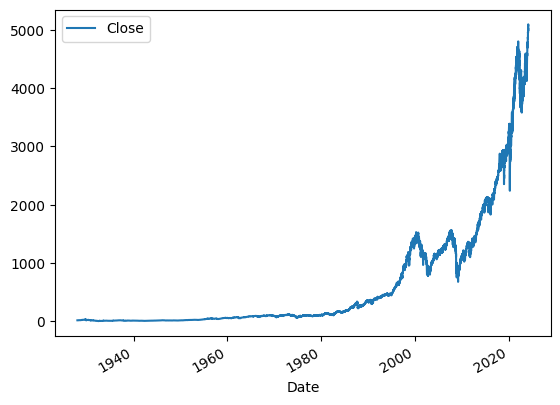

In [13]:
#plotting the closing price line chart
sp500.plot(kind="line", y="Close", use_index=True)

An interesting method to drop columns in a dataframe is using `del` to delete the column using the syntax `del df['column name']`

In [11]:
# removing the dividends and stock splits columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [14]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-02-22 00:00:00-05:00,5038.830078,5094.390137,5038.830078,5087.029785,4051710000
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000


#### 4. Set up the target for ML

In [15]:
# creating a column called Tomorrow(tomorrow's price) using shift method 
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-22 00:00:00-05:00,5038.830078,5094.390137,5038.830078,5087.029785,4051710000,5088.799805
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176


Shifting a column is moving its values up and down by a certain number of rows.This is achieved in pandas using the `shift()` function. The function takes a single argumeny, that is the number of rows to shift the column by.
If the arguments are positive, the column values are shifted downwards, if negative, the values are shifted upwards.\
In our case, the Close column prices were shifted back one day(by one row) to form the Tomorrow column.This enables us to create a column that shows tomorrow's price based on the future closing prices!😃

In [16]:
# using Tomorrow column to set up the target
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

Output is a boolean indicating whether tomorrow's price is greater than today's price\
It's a `1` when the price is `higher`(price increased) and a `O` when the price is `lower`(price decreased)

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-22 00:00:00-05:00,5038.830078,5094.390137,5038.830078,5087.029785,4051710000,5088.799805,1
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1


In [18]:
# choosing only data that came after 1990
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-22 00:00:00-05:00,5038.830078,5094.390137,5038.830078,5087.029785,4051710000,5088.799805,1
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1


#### 5. Training an initial ML model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# creating instance of the class
rand_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)


In [25]:
sp500.shape

(8605, 7)

In [26]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

In [28]:
# splitting the data into train and test sets

# training set has all of the rows except the last 100
train_set = sp500.iloc[:-100]
# test data=last 100 rows
test_set = sp500.iloc[-100:]

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']

When dealing with time series data, it's advisable not to use crossvalidation or any other splitting method that doesn't consider the time series nature of the data.This is because you will be using future data to predict the past, which is impractical, and will result in leakage(leaking information into the model).

In [29]:
# fiting the model
rand_model.fit(train_set[features], train_set["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

Since I'm familiar with the usual `train_test_split()` method, this is how I interpret the train and test sets for better understanding:
```python
X_train = train_set[features]
y_train = train_set["Target"]
X_test = test-set[features]
y_test = test_set["Target"]
```


In [30]:
# predicting
predicts = rand_model.predict(test_set[features])

In [31]:
predicts

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
# Turning predicts fron numpy array to pandas series
predicts = pd.Series(data=predicts, index = test_set.index )

In [33]:
predicts

Date
2023-10-05 00:00:00-04:00    1
2023-10-06 00:00:00-04:00    1
2023-10-09 00:00:00-04:00    0
2023-10-10 00:00:00-04:00    1
2023-10-11 00:00:00-04:00    1
                            ..
2024-02-22 00:00:00-05:00    0
2024-02-23 00:00:00-05:00    0
2024-02-26 00:00:00-05:00    0
2024-02-27 00:00:00-05:00    0
2024-02-28 00:00:00-05:00    0
Length: 100, dtype: int32

In [34]:
# evaluating model using precision score
from sklearn.metrics import precision_score

precision_score(test_set["Target"], predicts)

0.5357142857142857

In [35]:
# combining actual values (test_set["Target"]) and the predicted  values predicts
combined = pd.concat([test_set["Target"], predicts], axis=1)

<Axes: xlabel='Date'>

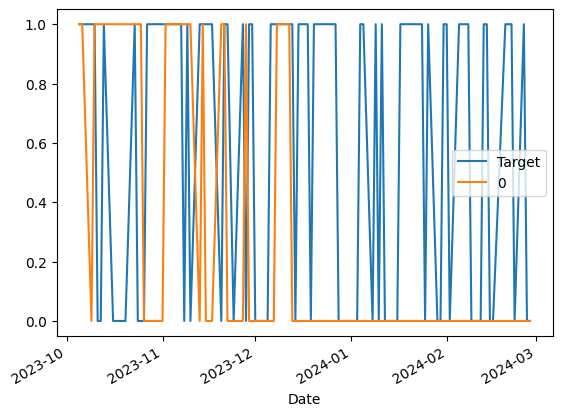

In [37]:
combined.plot()

The orange lines(0) are the model's predictions and the blue lines are what actually happened.\
The model mostly(from the start of 2024 onwards) predicted the prices to have gone down, which was not the case.


#### 5. Building a Backtesting system

In [38]:
# create a prediction function that fits and predicts
def predict(train_set, test_set, features, rand_model):
    rand_model.fit(train_set[features], test_set["Target"])
    predicts = rand_model.predict(test_set[features])
    predicts = pd.Series(data=predicts, index = test_set.index, name="Predictions")
    combined = pd.concat([test_set["Target"], predicts], axis=1)
    return combined
    

In [41]:
# create a backtesting function
def backtest(data, rand_model, features, start=2500, step=250):
    all_predictions = [] # list of dataframes, where each datafrane is the predictions for a single year

    # looping across the data
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy() # training set is all years before current year
        test = data.iloc[i:(i+step)].copy() # test set is the current year
        predictions = predict(train,test, features,rand_model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)
    

During backtesting, one takes a certain amount of data to train the model. Every trading year has around 250 days. So taking 2500/250 gives us 10 years of data. This 10 years of data is used train the **first** model.
What is happening is that the model is initially using the first 10 years of data to predict values for the 11th year.Then takes values for the first 11 years and use it to predict the 12th year...

In [42]:
prediction = backtest(sp500, rand_model, features)

ValueError: Found input variables with inconsistent numbers of samples: [2500, 250]